In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  

def importdata(): 
    balance_data = pd.read_csv('golf_dataset-Copy1.csv') 
    balance_data['Outlook'].replace(['Rainy','Overcast','Sunny'],[0,1,2],inplace=True)
    balance_data['Temp'].replace(['Hot','Mild','Cool'],[0,1,2],inplace=True)
    balance_data['Humidity'].replace(['Normal','High'],[0,1],inplace=True)
    balance_data['Play Golf'].replace(['No','Yes'],[0,1],inplace=True)
    print ("Dataset: ",balance_data.head()) 
    return balance_data




In [2]:
data = importdata()
data

Dataset:     Outlook  Temp  Humidity  Windy  Play Golf
0        0     0         1      0          0
1        0     0         1      1          0
2        1     0         1      0          1
3        2     1         1      0          1
4        2     2         0      0          1


,Outlook,Temp,Humidity,Windy,Play Golf
0,0,0,1,0,0
1,0,0,1,1,0
2,1,0,1,0,1
3,2,1,1,0,1
4,2,2,0,0,1
5,2,2,0,1,0
6,1,2,0,1,1
7,0,1,1,0,0
8,0,2,0,0,1
9,2,1,0,0,1


In [3]:
X=data[['Outlook','Temp','Humidity','Windy']]
X

,Outlook,Temp,Humidity,Windy
0,0,0,1,0
1,0,0,1,1
2,1,0,1,0
3,2,1,1,0
4,2,2,0,0
5,2,2,0,1
6,1,2,0,1
7,0,1,1,0
8,0,2,0,0
9,2,1,0,0


In [4]:

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3
)
y_km = km.fit_predict(X)

C:\Users\Naboth Demetrius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Naboth Demetrius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
y_km

array([2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1])

C:\Users\Naboth Demetrius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Naboth Demetrius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


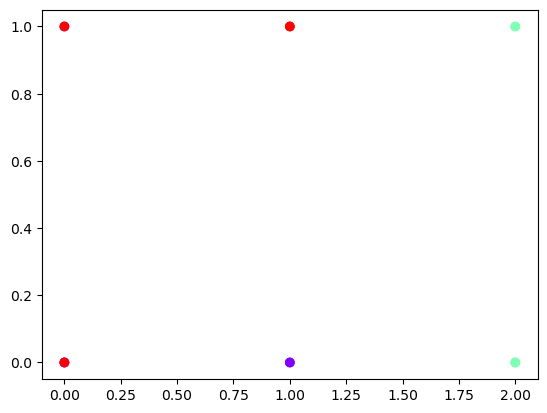

In [6]:
plt.scatter(X['Outlook'], X['Windy'],c = km.fit_predict(X), cmap ='rainbow')
plt.show()

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XP = pca.fit_transform(X)
XP = pd.DataFrame(XP)
XP.columns = ['A','B']
XP

,A,B
0,-1.517969,-0.196159
1,-1.452465,-0.010984
2,-0.788788,-0.873593
3,0.563491,-0.936377
4,1.461823,0.037437
5,1.527326,0.222613
6,0.798146,0.900047
7,-0.894870,0.418490
8,0.003462,1.392305
9,0.838724,-0.577212


In [10]:

from sklearn.preprocessing import normalize
XP = normalize(XP)
XP
XP = pd.DataFrame(XP)
XP.columns = ['C1','C2']
XP

,C1,C2
0,-0.991754,-0.128159
1,-0.999971,-0.007562
2,-0.670163,-0.742214
3,0.515615,-0.856820
4,0.999672,0.025602
5,0.989544,0.144229
6,0.663483,0.748191
7,-0.905840,0.423621
8,0.002487,0.999997
9,0.823771,-0.566922


C:\Users\Naboth Demetrius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Naboth Demetrius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


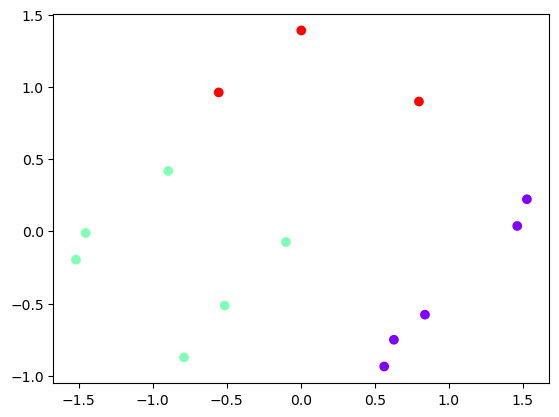

In [9]:
XP.columns = ['C1','C2']
plt.scatter(XP['C1'],XP['C2'],c=km.fit_predict(XP),cmap='rainbow')
plt.show()

In [ ]:
help()